**Fashionista**

There will be grayscale images ranging from 0 to 255
0 represents black and 255 represents gray
And we can also represent the above gray scales ranging from 0 to 255
into binary codes such as 0s will become 00000000(8 bit format)
Basically the dataset has 784 pixels and all of it in an excel, and each row represents an image and the numbers will range from 0 to 255



In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
!ls /content/drive/MyDrive

'Colab Notebooks'   fashion-mnist_test.csv   fashion-mnist_train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv('drive/MyDrive/fashion-mnist_train.csv')

In [6]:
df_train.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [7]:
df_train.shape

(60000, 785)

In [8]:
training_array = np.array(df_train, dtype = 'float32')

In [9]:
training_array.shape

(60000, 785)

In [10]:
df_test = pd.read_csv('drive/MyDrive/fashion-mnist_test.csv')

In [11]:
df_test.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [12]:
testing_array = np.array(df_test, dtype = 'float32')

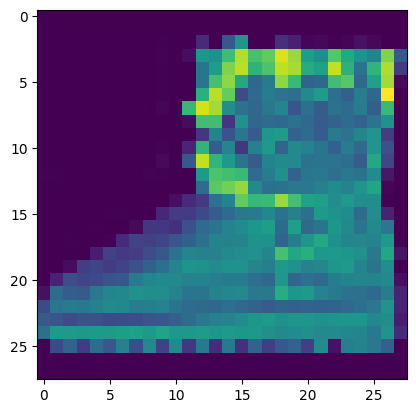

In [13]:
plt.imshow(training_array[12, 1:].reshape(28, 28))

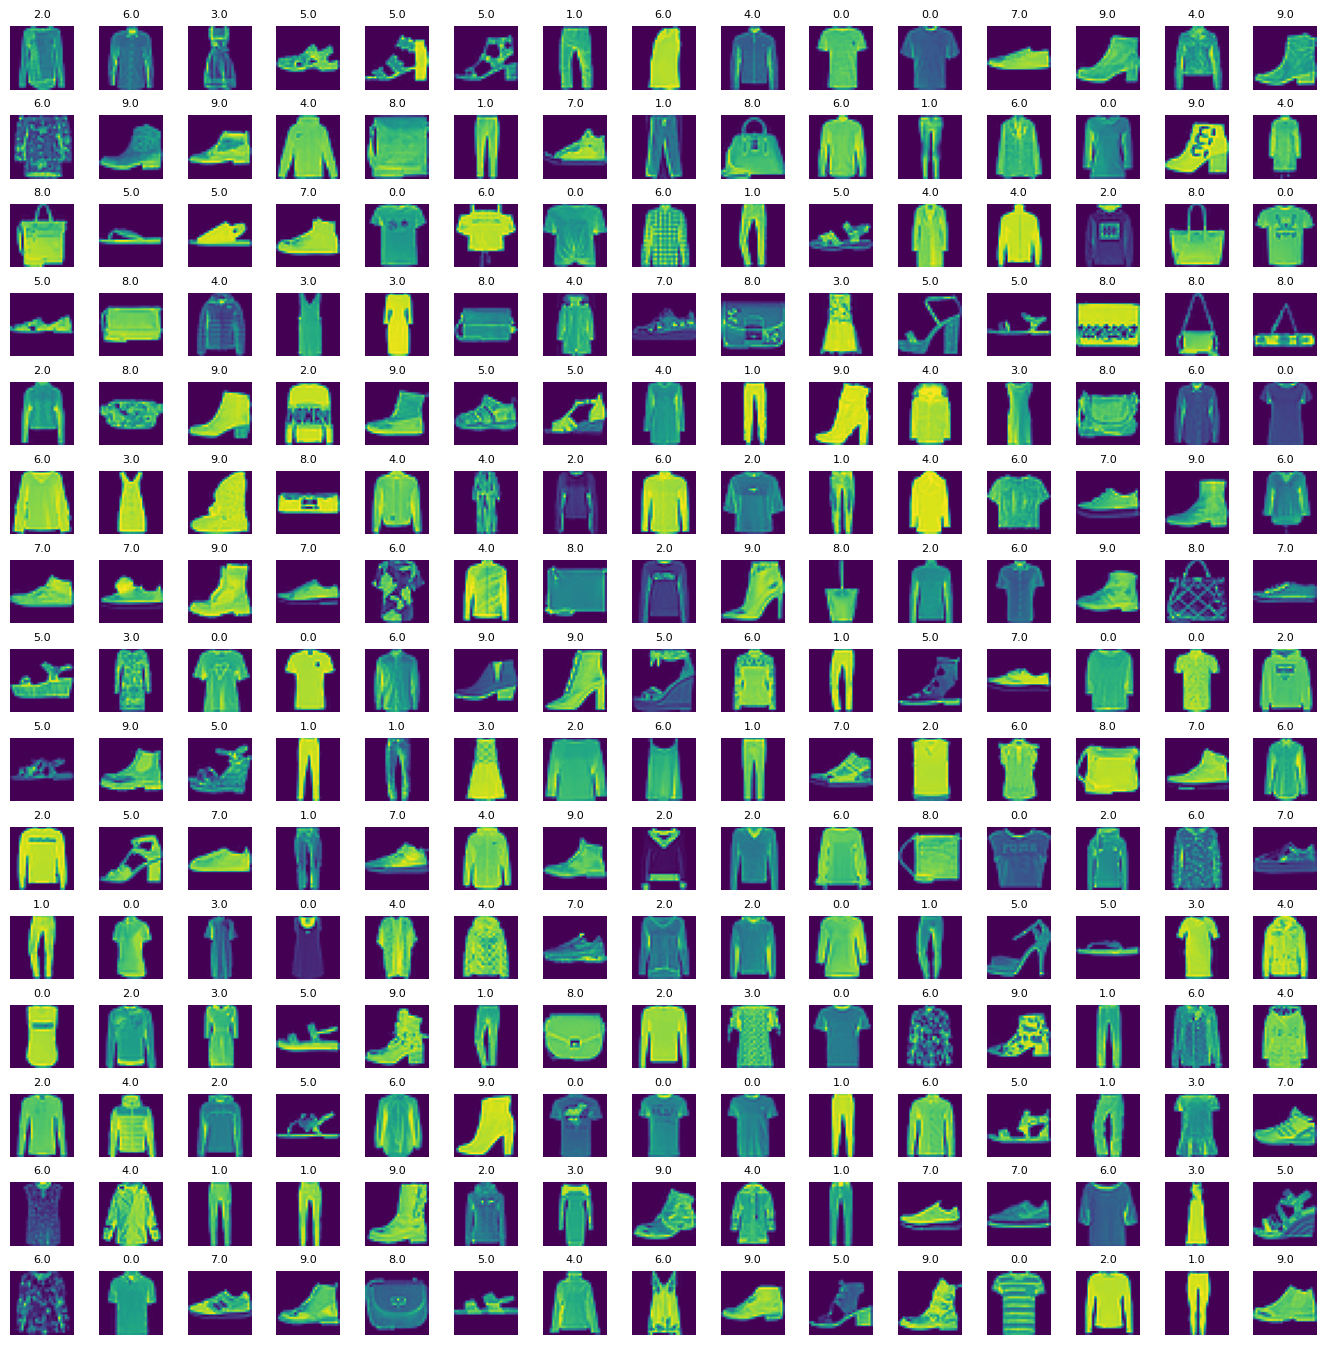

In [14]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid, figsize = (17, 17))

axes = axes.ravel()

n_training = len(training_array)

for i in np.arange(0, w_grid*l_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training_array[index, 1:].reshape(28, 28))
  axes[i].set_title(training_array[index, 0], fontsize = 8)
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

But one thing we cannot directly fit these images into the neural network, we first need to convolve them, pool them flatten them and then
pass them through the neural network

And for that we have an aspect called kernel where we can pass it over the image and extract features from it

Image kernel is a matrix used to apply effects such as sharpening and 
blurring

Convolution preserves the spatial relationship between the pixels

Post that we need to perform something called the RELU transformation here we can get the exact replica of the numbers except the negative ones

After that we need to perform max pooling this basically keep the most prominent feature and it also helps in generalizing and it can help in places where the images maybe tilted or in different orientations, so max pooling can help in generalizing the image

Post that we do something called as flattening where we can get all the dimensions in 1D

And this 1D array will be then fed to the Neural Network

In [15]:
X_train = training_array[:, 1:]/255
y_train = training_array[:, 0]

X_test = testing_array[:, 1:]/255
y_test = testing_array[:, 0]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.3, random_state = 12345)

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [19]:
X_train.shape

(42000, 28, 28, 1)

In [20]:
X_test.shape

(10000, 28, 28, 1)

In [21]:
X_validate.shape

(18000, 28, 28, 1)

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [48]:
cnn_model = Sequential()

In [103]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))
# ###let me explain this line, here 32 kernels or features are sent with different weights and each of them get different features from the image and then we get a final matrix
# ##of 26, 26, 32(consists 32 features images of size 26*26)

In [107]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
##and the output here would be (13, 13, 32)

In [52]:
cnn_model.add(Flatten())

In [53]:
cnn_model.add(Dense(units = 32, activation = 'relu'))

In [54]:
##cnn_model.add(Dense(units = 32, activation = 'relu'))

In [55]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [56]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr = 0.01), metrics=['accuracy'])

In [57]:
cnn_model.fit(X_train, y_train, epochs=50, batch_size=512, verbose = 1, validation_data=(X_validate, y_validate))


Epoch 1/50
83/83 [==============================] - 6s 68ms/step - loss: 1.0549 - accuracy: 0.6165 - val_loss: 0.7412 - val_accuracy: 0.7125
Epoch 2/50
83/83 [==============================] - 3s 35ms/step - loss: 0.6475 - accuracy: 0.7627 - val_loss: 0.7234 - val_accuracy: 0.7013
Epoch 3/50
83/83 [==============================] - 3s 34ms/step - loss: 0.5924 - accuracy: 0.7805 - val_loss: 0.5786 - val_accuracy: 0.7878
Epoch 4/50
83/83 [==============================] - 3s 38ms/step - loss: 0.5461 - accuracy: 0.7977 - val_loss: 0.5753 - val_accuracy: 0.7949
Epoch 5/50
83/83 [==============================] - 5s 56ms/step - loss: 0.5205 - accuracy: 0.8084 - val_loss: 0.5281 - val_accuracy: 0.8097
Epoch 6/50
83/83 [==============================] - 4s 43ms/step - loss: 0.4953 - accuracy: 0.8175 - val_loss: 0.5546 - val_accuracy: 0.7897
Epoch 7/50
83/83 [==============================] - 3s 35ms/step - loss: 0.4898 - accuracy: 0.8192 - val_loss: 0.5354 - val_accuracy: 0.8076
Epoch 8/50
83

In [58]:
evaluation = cnn_model.evaluate(X_test, y_test)###the model predicts based on x_test and based on what labels we receive differnt metrices are displayed

313/313 [==============================] - 2s 7ms/step - loss: 0.4994 - accuracy: 0.8314


In [66]:
print("The test accuracy is : {}".format(round(evaluation[1], 3)))

The test accuracy is : 0.831


In [92]:
predictions = np.argmax(cnn_model.predict(X_test), axis=-1)


313/313 [==============================] - 1s 4ms/step


In [93]:
predictions

array([0, 1, 2, ..., 8, 8, 4])

<Axes: >

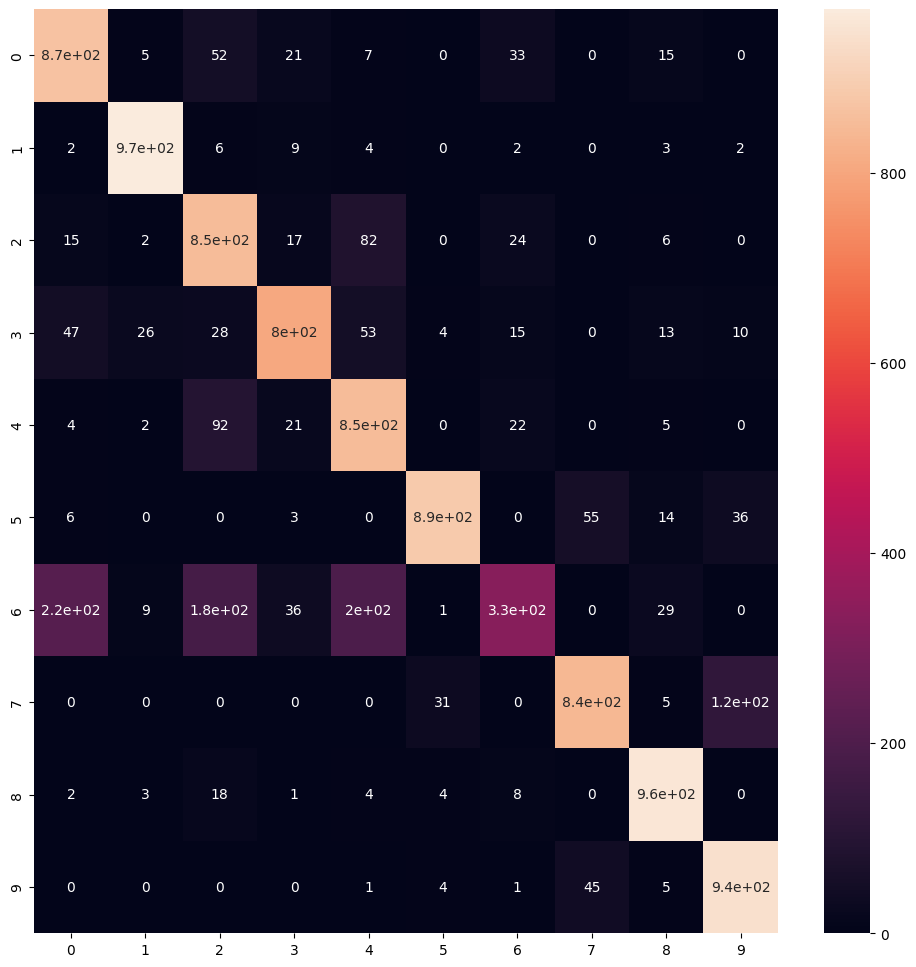

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize = (12, 12))
sns.heatmap(cm, annot = True)

In [101]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = {"Class {}". format(i) for i in range(num_classes)}

print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

     Class 6       0.75      0.87      0.80      1000
     Class 9       0.95      0.97      0.96      1000
     Class 4       0.70      0.85      0.77      1000
     Class 3       0.88      0.80      0.84      1000
     Class 5       0.71      0.85      0.78      1000
     Class 1       0.95      0.89      0.92      1000
     Class 7       0.76      0.33      0.46      1000
     Class 8       0.89      0.84      0.87      1000
     Class 0       0.91      0.96      0.93      1000
     Class 2       0.85      0.94      0.89      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.82     10000
weighted avg       0.84      0.83      0.82     10000



In [ ]:
####One way to increase the model performance is to increase the number of filters or kernels

In [108]:
#NEW MODEL WITH 64 KERNEL WITHOUT DROPOUT

In [109]:
cnn_model_two = Sequential()

In [110]:
cnn_model_two.add(Conv2D(64, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [111]:
cnn_model_two.add(MaxPooling2D(pool_size = (2, 2)))

In [112]:
cnn_model_two.add(Flatten())

In [113]:
cnn_model_two.add(Dense(units = 32, activation = 'relu'))

In [114]:
cnn_model_two.add(Dense(units = 10, activation = 'sigmoid'))

In [116]:
cnn_model_two.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate = 0.01), metrics=['accuracy'])

In [117]:
cnn_model_two.fit(X_train, y_train, epochs=50, batch_size=512, verbose = 1, validation_data=(X_validate, y_validate))


Epoch 1/50
83/83 [==============================] - 7s 80ms/step - loss: 0.7508 - accuracy: 0.7269 - val_loss: 0.6100 - val_accuracy: 0.7558
Epoch 2/50
83/83 [==============================] - 4s 47ms/step - loss: 0.4786 - accuracy: 0.8236 - val_loss: 0.4732 - val_accuracy: 0.8283
Epoch 3/50
83/83 [==============================] - 4s 46ms/step - loss: 0.4361 - accuracy: 0.8400 - val_loss: 0.7236 - val_accuracy: 0.7379
Epoch 4/50
83/83 [==============================] - 6s 70ms/step - loss: 0.4211 - accuracy: 0.8471 - val_loss: 0.4698 - val_accuracy: 0.8249
Epoch 5/50
83/83 [==============================] - 4s 45ms/step - loss: 0.3940 - accuracy: 0.8561 - val_loss: 0.4068 - val_accuracy: 0.8522
Epoch 6/50
83/83 [==============================] - 4s 46ms/step - loss: 0.3737 - accuracy: 0.8625 - val_loss: 0.4152 - val_accuracy: 0.8508
Epoch 7/50
83/83 [==============================] - 4s 54ms/step - loss: 0.3652 - accuracy: 0.8649 - val_loss: 0.5237 - val_accuracy: 0.8200
Epoch 8/50
83

In [118]:
evaluation = cnn_model_two.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4584 - accuracy: 0.8687
